In [1]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic Libraries for Data organization, Statistical operations and Plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For loading .arff files
from scipy.io import arff


# To analyze the type of missing data
import missingno as msno


# Library for performing k-NN imputations 
import fancyimpute

#Library for preprocessing
from sklearn.preprocessing import scale

#To perform kFold Cross Validation
from sklearn.model_selection import StratifiedKFold

# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 

# Impoting classification models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Evaluation of Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV




Using TensorFlow backend.


In [23]:
from google.colab import files
uploaded=files.upload()

KeyboardInterrupt: ignored

In [0]:
#Loading the Data

############################################################
# Loads the 5 raw .arff files into a list
def load_arff_raw_data():
    N=5
    return [arff.loadarff(str(i+1) + 'year.arff') for i in range(N)]

############################################################
# Loads the 5 raw .arff files into pandas dataframes
def load_dataframes():
    return [pd.DataFrame(data_i_year[0]) for data_i_year in load_arff_raw_data()]

############################################################
# Set the column headers from X1 ... X64 and the class label as Y, for all the 5 dataframes.
def set_new_headers(dataframes):
    cols = ['X' + str(i+1) for i in range(len(dataframes[0].columns)-1)]
    cols.append('Y')
    for df in dataframes:
        df.columns = cols

############################################################
# dataframes is the list of pandas dataframes for the 5 year datafiles.  
dataframes = load_dataframes()

# Set the new headers for the dataframes. The new headers will have the renamed set of feature (X1 to X64)
set_new_headers(dataframes)    

In [3]:
#Viewing the Data

#Print the Head & tail of record
dataframes[0].iloc[:,36]
#dataframes[0].tail()

#Describing the Data
for i in range(len(dataframes)):
  print(dataframes[i].describe())
  
#Getting Info about The data
for i in range(len(dataframes)):
  print(dataframes[i].info())
  
#Knowing the Dimensions
for i in range(len(dataframes)):
  print(dataframes[i].shape)


                X1           X2           X3           X4            X5  \
count  7024.000000  7024.000000  7024.000000  6997.000000  7.019000e+03   
mean      0.034660     0.560215     0.119969     2.629143 -2.631672e+02   
std       4.565504     5.350084     5.275459    13.257356  3.707460e+04   
min    -256.890000   -72.162000  -440.500000     0.000000 -2.722100e+06   
25%       0.021182     0.296678     0.026968     1.063100 -4.449800e+01   
50%       0.075802     0.482960     0.181275     1.502000 -5.373900e+00   
75%       0.160268     0.680233     0.362548     2.460700  3.777050e+01   
max      94.280000   441.500000     1.000000  1017.800000  9.909000e+05   

                X6           X7           X8           X9          X10  \
count  7024.000000  7024.000000  7002.000000  7026.000000  7024.000000   
mean      0.059712     0.313876     2.623996     5.552855     1.825832   
std       6.051113     8.353274    18.708327   101.995448    33.836452   
min    -397.890000  -189.560

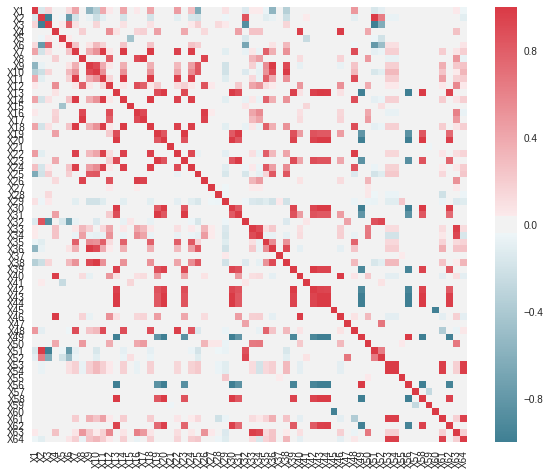

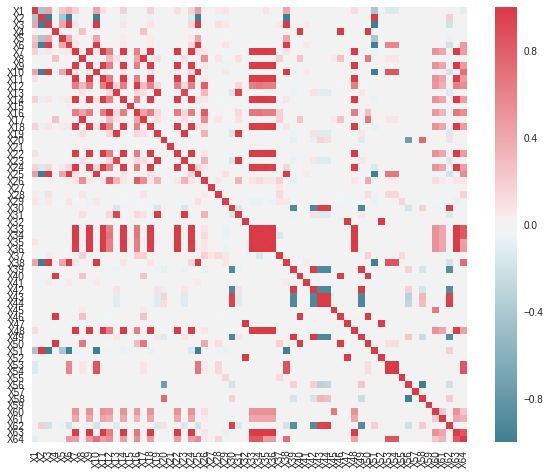

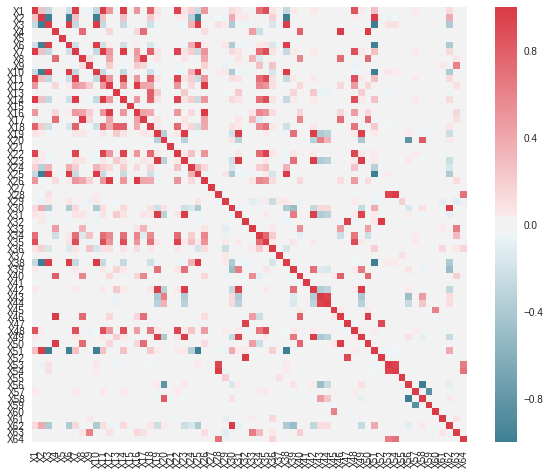

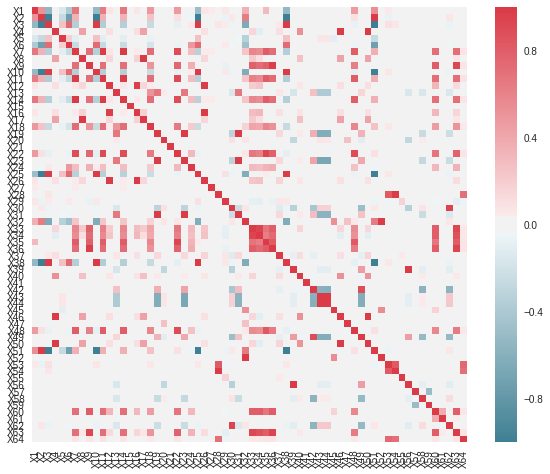

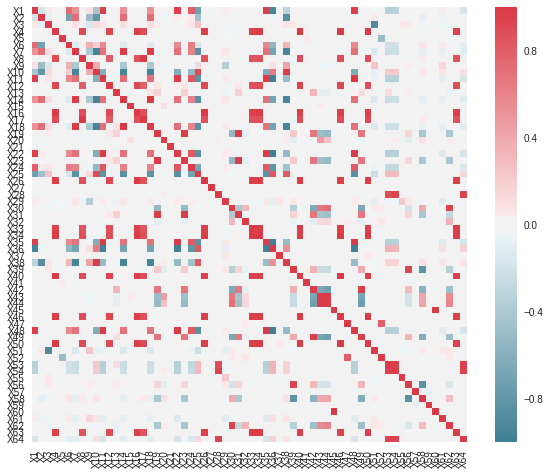

In [4]:
#Viewing the Correlation among variables
for i in range(len(dataframes)):
  correlations = dataframes[i].corr()
  #print(correlations)
  f, ax = plt.subplots(figsize=(10, 8))
  sns.heatmap(correlations, mask=np.zeros_like(correlations, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)
 

In [5]:
#Converting the label into int
for i in range(len(dataframes)):
  col = getattr(dataframes[i], 'Y')
  dataframes[i]['Y'] = col.astype(int)
        
#Checking the changed DataType
dataframes[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
X1     7024 non-null float64
X2     7024 non-null float64
X3     7024 non-null float64
X4     6997 non-null float64
X5     7019 non-null float64
X6     7024 non-null float64
X7     7024 non-null float64
X8     7002 non-null float64
X9     7026 non-null float64
X10    7024 non-null float64
X11    6988 non-null float64
X12    6997 non-null float64
X13    7027 non-null float64
X14    7024 non-null float64
X15    7025 non-null float64
X16    7002 non-null float64
X17    7002 non-null float64
X18    7024 non-null float64
X19    7027 non-null float64
X20    7027 non-null float64
X21    5405 non-null float64
X22    7024 non-null float64
X23    7027 non-null float64
X24    6903 non-null float64
X25    7024 non-null float64
X26    7002 non-null float64
X27    6716 non-null float64
X28    6993 non-null float64
X29    7024 non-null float64
X30    7027 non-null float64
X31    7027 non-null fl

In [6]:
#Viewing Statistically The Missing Data Individually
for i in range(len(dataframes)):
  print(dataframes[i].isnull().sum())

X1        3
X2        3
X3        3
X4       30
X5        8
X6        3
X7        3
X8       25
X9        1
X10       3
X11      39
X12      30
X13       0
X14       3
X15       2
X16      25
X17      25
X18       3
X19       0
X20       0
X21    1622
X22       3
X23       0
X24     124
X25       3
X26      25
X27     311
X28      34
X29       3
X30       0
       ... 
X36       3
X37    2740
X38       3
X39       0
X40      30
X41      84
X42       0
X43       0
X44       0
X45     134
X46      31
X47      29
X48       3
X49       0
X50      25
X51       3
X52      29
X53      34
X54      34
X55       0
X56       0
X57       1
X58       0
X59       1
X60     135
X61      22
X62       0
X63      30
X64      34
Y         0
Length: 65, dtype: int64
X1        1
X2        1
X3        1
X4       22
X5       24
X6        1
X7        1
X8       18
X9        4
X10       1
X11       1
X12      22
X13      63
X14       1
X15      12
X16      19
X17      18
X18       1
X19      64
X20      63
X21

In [7]:
#Seeing the Missing Data Overall
clean_dataframes = [df.dropna(axis=0, how='any') for df in dataframes]
for i in range(len(dataframes)):
   print(str(i+1)+'year:','Original Length=', len(dataframes[i]), '\tCleaned Length=', len(clean_dataframes[i]), '\tMissing Data=', len(dataframes[i])-len(clean_dataframes[i]))

1year: Original Length= 7027 	Cleaned Length= 3194 	Missing Data= 3833
2year: Original Length= 10173 	Cleaned Length= 4088 	Missing Data= 6085
3year: Original Length= 10503 	Cleaned Length= 4885 	Missing Data= 5618
4year: Original Length= 9792 	Cleaned Length= 4769 	Missing Data= 5023
5year: Original Length= 5910 	Cleaned Length= 3031 	Missing Data= 2879


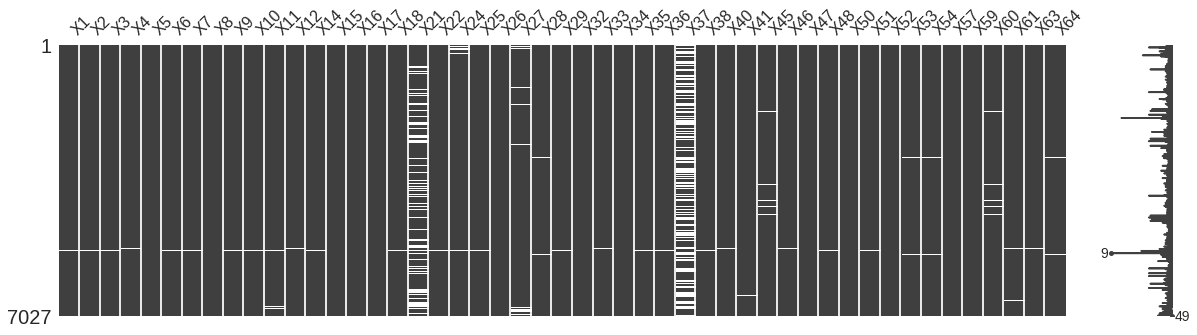

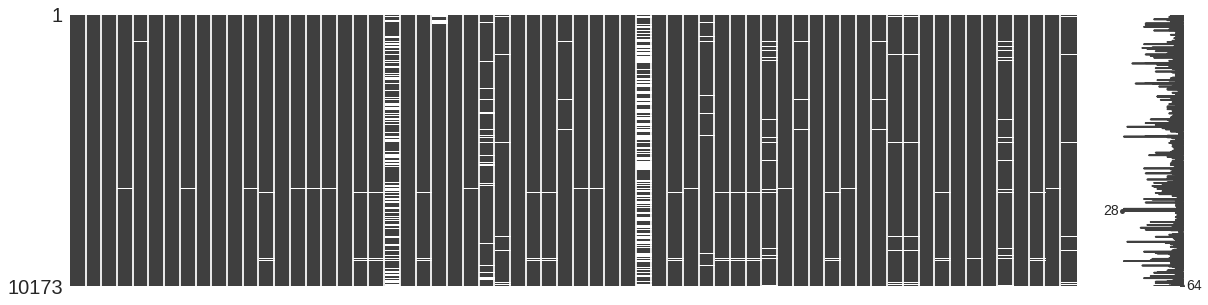

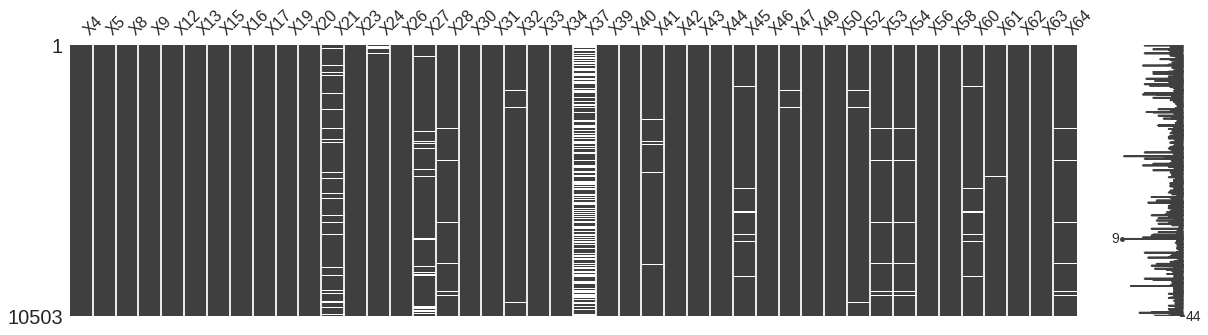

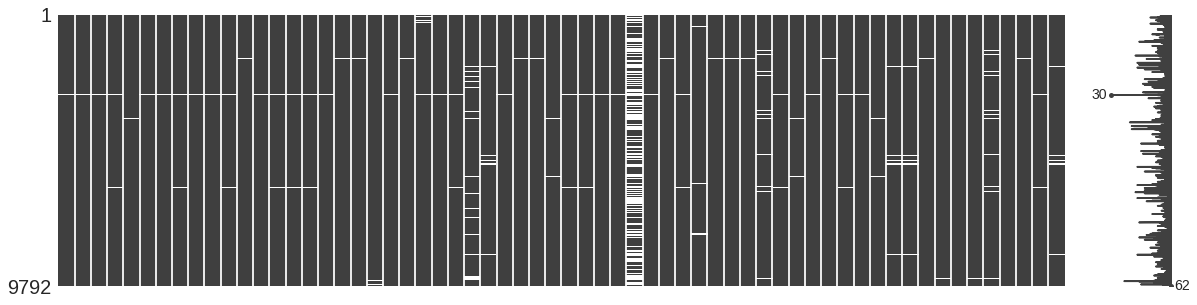

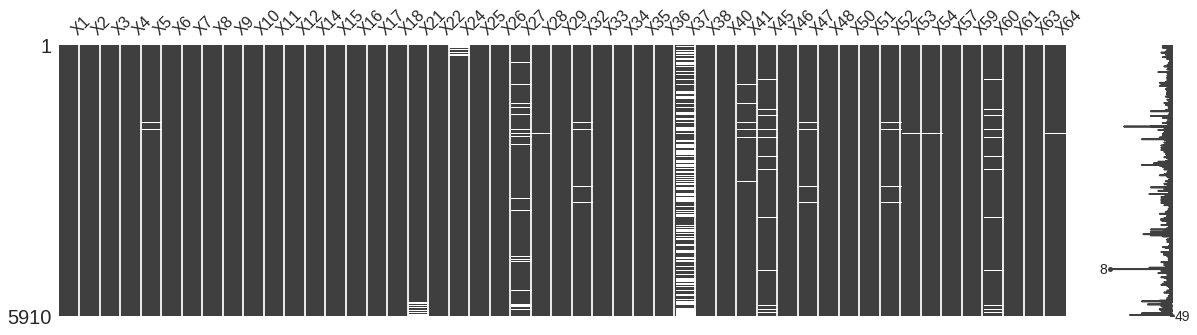

In [8]:
#Visulazing the Missing Values
for i in range(5):
  missing_df_i = dataframes[i].columns[dataframes[i].isnull().any()].tolist()
  msno.matrix(dataframes[i][missing_df_i], figsize=(20,5))

In [9]:
#From above Graph we observed that x37 in each & every year has highest missing values ... So droping that column
for i in range(len(dataframes)):
  dataframes[i].drop('X37',axis = 1,inplace = True)
  
#Checking if column 37 is removed
for i in range(len(dataframes)):
  print(list(dataframes[i]))

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'Y']
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'Y']
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',

In [10]:
#Mean Imputation
def perform_mean_imputation(dfs):
  for i in range(len(dfs)):
     mean_imputate = dfs[i].fillna(dfs[i].mean(),inplace =True)
  return mean_imputate

perform_mean_imputation(dataframes)

#Checking if null values have been removed
dataframes[0].isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
      ..
X35    0
X36    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
X58    0
X59    0
X60    0
X61    0
X62    0
X63    0
X64    0
Y      0
Length: 64, dtype: int64

In [11]:
#Scaling
final_data = []
for i in range(len(dataframes)):
  mean_scale = scale(dataframes[i])
  final_data.append(pd.DataFrame(mean_scale))
print(final_data[0])

            0         1         2          3         4         5         6   \
0     0.036346 -0.033786  0.052416  -0.043993  0.007976  0.054309 -0.007678   
1     0.038224 -0.011281  0.066796  -0.051742  0.007502 -0.009871 -0.006650   
2     0.046887  0.025372  0.027903  -0.081217  0.007072 -0.009871 -0.000577   
3     0.010259 -0.047279  0.064244  -0.010307  0.008505  0.014905 -0.026485   
4     0.033447  0.009912  0.020787  -0.092443  0.006905  0.021094 -0.015155   
5     0.042408 -0.011643  0.045454  -0.066445  0.005815 -0.009871 -0.003890   
6     0.016746  0.016308  0.032185  -0.087590  0.007171 -0.009871 -0.024283   
7     0.109035 -0.099682  0.111031   3.879993  0.015189 -0.009871  0.040537   
8    -0.005618  0.013425 -0.012559  -0.113610  0.006082 -0.009871 -0.035858   
9     0.019592  0.052006  0.004185  -0.110352  0.004623 -0.009871 -0.019231   
10    0.044991 -0.021812  0.012966  -0.089895  0.006532 -0.163919 -0.008845   
11   -0.013535 -0.083898 -0.000015  -0.041861  0.006

In [12]:
#Solving the class Imbalance Problem
def check_data_imbalance(dfs):
    for i in range(len(dfs)):
        print('Dataset: '+str(i+1)+'year')
        print(dfs[i].groupby('Y').size())
        minority_percent = (dfs[i]['Y'].tolist().count(1) / len(dfs[i]['Y'].tolist()))*100
        print('Minority (label 1) percentage: '+  str(minority_percent) + '%')
        print('-'*64)
        
check_data_imbalance(dataframes)

Dataset: 1year
Y
0    6756
1     271
dtype: int64
Minority (label 1) percentage: 3.856553294435748%
----------------------------------------------------------------
Dataset: 2year
Y
0    9773
1     400
dtype: int64
Minority (label 1) percentage: 3.931976801336872%
----------------------------------------------------------------
Dataset: 3year
Y
0    10008
1      495
dtype: int64
Minority (label 1) percentage: 4.712939160239932%
----------------------------------------------------------------
Dataset: 4year
Y
0    9277
1     515
dtype: int64
Minority (label 1) percentage: 5.259395424836601%
----------------------------------------------------------------
Dataset: 5year
Y
0    5500
1     410
dtype: int64
Minority (label 1) percentage: 6.937394247038917%
----------------------------------------------------------------


Year1


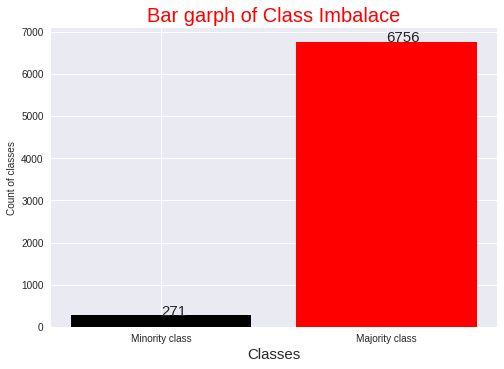

Year2


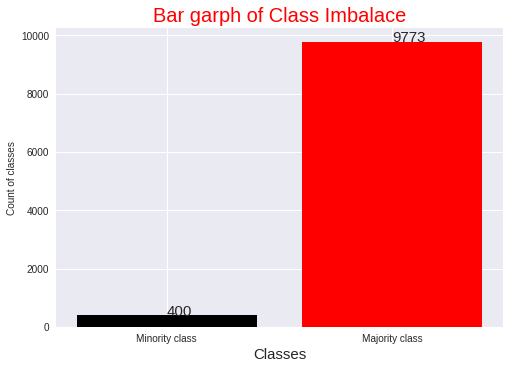

Year3


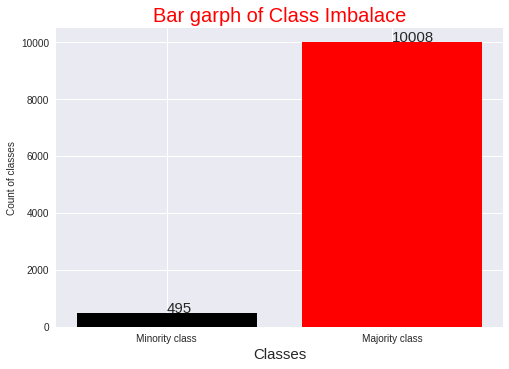

Year4


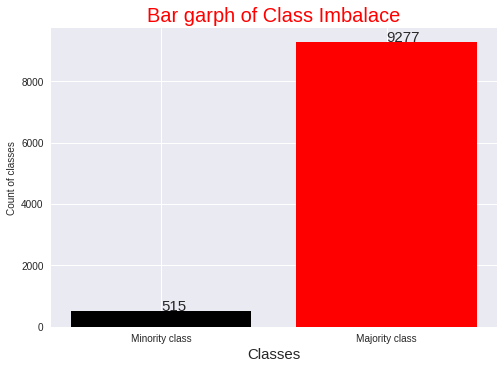

Year5


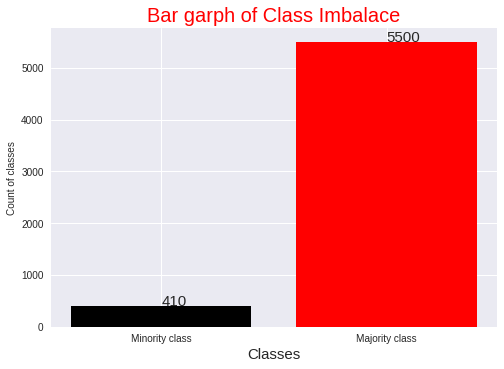

In [13]:
#visualizing the imbalanced data
visual_mcl=[ ]
visual_maj=[ ]
def check_data_imbalance(dfs):
    for i in range(len(dfs)):
        visual_mcl.append(dfs[i]['Y'].tolist().count(1))
        visual_maj.append(len(dfs[i]['Y'].tolist())-dfs[i]['Y'].tolist().count(1))
check_data_imbalance(dataframes)


for i in range(0,5):
    xvalues=['Minority class','Majority class']
    yvalues=[visual_mcl[i],visual_maj[i]]
    plt.bar(xvalues,yvalues,color=['k','r'])
    plt.xlabel('Classes',fontsize=15)
    plt.ylabel('Count of classes',fontsize=10)  
    plt.title('Bar garph of Class Imbalace',fontsize=20,color='R')
    for x,y in zip(xvalues,yvalues):
        plt.text(x,y,y,fontsize=15)
    print("Year"+str(i+1))
    plt.show()

In [0]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')

# eXtreme Gradient Boosting Classifier (XGBClassifier)
xgb_classifier = XGBClassifier()

#svm
svm_classifier=SVC()

#Logistic Classifier
logistic_classifier = LogisticRegression()


In [0]:
def set_new_headers_train(dataframes):
  
  cols=[]
  H=[5,6,13,21,22,24,27,29,30,34,38,39,40,41,42,44,46,47,56,58,60]
  for i in range(0,len(H)):
   #print(i)
   cols.append('X' + str(H[i]))
    #print(cols)
  dataframes.columns = cols
       
def set_new_headers_test(dataframes):
  
  cols = ['Y']
  dataframes.columns = cols

In [16]:
# K fold and halding the imbalanced data using smote

#1,3,6,7,11,12,13,14,16,18,19,22,24,26,33,35,38,42,48,50,51,52,56,58,63
A=['X5','X6','X13','X21','X22','X24','X27','X29','X30','X34','X38','X39','X40','X41','X42','X44','X46','X47','X56','X58','X60']
X = dataframes[0].loc[:,A]
X = X.values
y = dataframes[0].iloc[:,63]
y = y.values


n_measures = 3
s =(5,n_measures)

scores = np.zeros(s)

print(scores[0,0])

kf = StratifiedKFold(n_splits= 5) #Stratified because we need balanced samples
kf.get_n_splits(X)

cnt=0
acc=0
for train_index, test_index in kf.split(X,y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  #print(X_train)
  
  sm = SMOTE(ratio='auto' , random_state=42, k_neighbors=100)
  x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
  
  x_train_res = pd.DataFrame(x_train_res)
  y_train_res = pd.DataFrame(y_train_res)
  X_test=pd.DataFrame(X_test)
  y_test=pd.DataFrame(y_test)
  
  set_new_headers_train(x_train_res)
  set_new_headers_test(y_train_res)
  set_new_headers_train(X_test)
  set_new_headers_test(y_test)
  
  xgb_classifier.fit(x_train_res, y_train_res)
  y_pred =xgb_classifier.predict(X_test)
  
  

  scores[cnt,0] = recall_score(y_test, y_pred)
  scores[cnt,1] = accuracy_score(y_test, y_pred)
  scores[cnt,2] = precision_score(y_test, y_pred)
  cnt=cnt+1

#print(scores)
#print(type(x_train_res))

0.0
TRAIN: [1352 1353 1354 ... 7024 7025 7026] TEST: [   0    1    2 ... 6808 6809 6810]
TRAIN: [   0    1    2 ... 7024 7025 7026] TEST: [1352 1353 1354 ... 6862 6863 6864]
TRAIN: [   0    1    2 ... 7024 7025 7026] TEST: [2703 2704 2705 ... 6916 6917 6918]
TRAIN: [   0    1    2 ... 7024 7025 7026] TEST: [4054 4055 4056 ... 6970 6971 6972]
TRAIN: [   0    1    2 ... 6970 6971 6972] TEST: [5405 5406 5407 ... 7024 7025 7026]


In [17]:
for i in range(0,5):
  x = dataframes[i].loc[:,A]
  y= dataframes[i].iloc[:,63]
  pred=xgb_classifier.predict(x)
  
  print("Results for Year %d"%(i+1))
  print('-'*64)
  
  print("Accuracy is for year %d is"%(i+1))
  print(accuracy_score(y, pred))
  
  print("Recall is for year %d is"%(i+1))
  print(recall_score(y, pred))
  
  print("Precision is for year %d is "%(i+1))
  print(precision_score(y, pred))
  
  print('-'*64)
  
  #print(classification_report(y, pred))
  print("Confusion matrix for Year %d is"%(i+1))
  print(confusion_matrix(y, pred))
  print('-'*64)
  print('\n'+'\n')


Results for Year 1
----------------------------------------------------------------
Accuracy is for year 1 is
0.9544613633129359
Recall is for year 1 is
0.8118081180811808
Precision is for year 1 is 
0.4498977505112474
----------------------------------------------------------------
Confusion matrix for Year 1 is
[[6487  269]
 [  51  220]]
----------------------------------------------------------------



Results for Year 2
----------------------------------------------------------------
Accuracy is for year 2 is
0.8323011894229824
Recall is for year 2 is
0.71
Precision is for year 2 is 
0.15154749199573106
----------------------------------------------------------------
Confusion matrix for Year 2 is
[[8183 1590]
 [ 116  284]]
----------------------------------------------------------------



Results for Year 3
----------------------------------------------------------------
Accuracy is for year 3 is
0.9226887555936399
Recall is for year 3 is
0.6222222222222222
Precision is for year

In [18]:
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.805946212681964

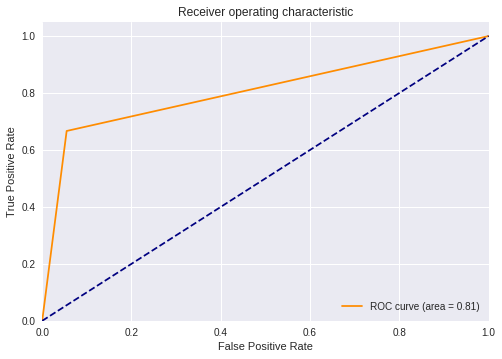

In [19]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [20]:
#Round 1: Tune max_depth and min_child_weight
# Define a new XGBoost Classifier with default parameters
select_xgb_clf = XGBClassifier(learning_rate=0.1, n_estimators=100, seed=10)

# Set a list of parameters
param_grid = {
    
            'max_depth':[3,4,5],
            'min_child_weight':[3,4,5]
}
grid_clf = GridSearchCV(select_xgb_clf,param_grid,cv=5,scoring='roc_auc' )

# Train the model
grid_clf.fit(x_train_res,y_train_res)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 4, 5], 'min_child_weight': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [21]:
 grid_clf.best_params_, grid_clf.best_score_

({'max_depth': 5, 'min_child_weight': 4}, 0.9965316316392554)

In [22]:
#Round 2: Tune subsample and colsample_bytree
# Define a new XGBoost Classifier setting the best value for the above parameter and 
# default for the rest
select_xgb_clf = XGBClassifier(learning_rate=0.1,n_estimators=100, max_depth= 5, 
                                   min_child_weight= 3,seed=10)

# Set a list of parameters
param_grid = {
    
            'subsample':[0.6,0.7,0.8,0.9],
            'colsample_bytree':[0.6,0.7,0.8,0.9]
}
grid_clf = GridSearchCV(select_xgb_clf,param_grid,cv=5, scoring='roc_auc')
grid_clf.fit(x_train_res,y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [23]:
 grid_clf.best_params_, grid_clf.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.8}, 0.9966635888070883)

In [24]:
#Round 3: Tune reg_alpha
# Define a new XGBoost Classifier with parameters setting so far.
select_xgb_clf = XGBClassifier(learning_rate=0.1,n_estimators=100, max_depth= 5, min_child_weight= 3,
                                   gamma=0,subsample=0.8, colsample_bytree=0.8, seed=10)

# Set a list of parameters
param_grid = {
    
         'reg_alpha':[0.001, 0.005, 0.01, 0.05]   
}
grid_clf = GridSearchCV(select_xgb_clf,param_grid,cv=5, scoring='roc_auc')

# Train the model
grid_clf.fit(x_train_res,y_train_res)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10, silent=True,
       subsample=0.8),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'reg_alpha': [0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [25]:
 grid_clf.best_params_, grid_clf.best_score_

({'reg_alpha': 0.001}, 0.9963637328303785)

In [0]:
#Round 4: Tune  estimators
# Define a new XGBoost Classifier.
import xgboost as xgb
select_xgb_clf = xgb.XGBClassifier( max_depth= 5, min_child_weight= 3,gamma=0,reg_alpha= 0.001,subsample=0.8, colsample_bytree=0.8, seed=10)

# Set a list of parameters
n_estimators = [100, 200, 300, 400, 500]

param_grid = dict(n_estimators=n_estimators)

grid_clf = GridSearchCV(select_xgb_clf, param_grid, scoring="neg_log_loss", cv=5)





In [0]:
grid_clf = grid_clf.fit(x_train_res,y_train_res)

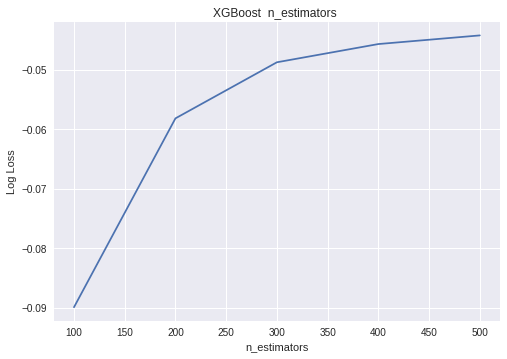

In [36]:
# Plot performance for estimators
from matplotlib import pyplot
n_estimators = [100, 200, 300, 400, 500]
loss = [-0.089934, -0.058162, -0.048726, -0.045660, -0.044206]
plt.plot(n_estimators, loss)
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.title('XGBoost  n_estimators ')
plt.show()




In [0]:

#Round 5: Tune learning_rate 
# Define a new XGBoost Classifier.
select_xgb_clf = XGBClassifier(n_estimators=500, max_depth = 5, min_child_weight= 3,gamma=0,reg_alpha= 0.001,subsample=0.8, colsample_bytree=0.8, seed=10)

# Set a list of parameters
learning_rate = [0.0001, 0.001, 0.01, 0.1,0.2,0.3]
param_clf = dict( learning_rate=learning_rate )

grid_clf = GridSearchCV(select_xgb_clf, param_clf, cv=5)



In [0]:
grid_clf = grid_clf.fit(x_train_res,y_train_res)

In [39]:
 grid_clf.best_params_, grid_clf.best_score_

({'learning_rate': 0.2}, 0.9852913968547641)

In [40]:
# summarize results
print("Best: %f using %s" % (grid_clf.best_score_, grid_clf.best_params_))
means = grid_clf.cv_results_['mean_test_score']
stds = grid_clf.cv_results_['std_test_score']
params = grid_clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.985291 using {'learning_rate': 0.2}
0.907031 (0.012097) with: {'learning_rate': 0.0001}
0.912951 (0.009548) with: {'learning_rate': 0.001}
0.949399 (0.008567) with: {'learning_rate': 0.01}
0.984921 (0.010691) with: {'learning_rate': 0.1}
0.985291 (0.008797) with: {'learning_rate': 0.2}
0.984459 (0.009536) with: {'learning_rate': 0.3}


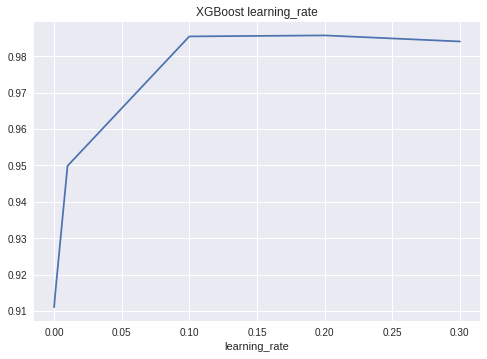

In [41]:
# Plot performance for learning_rate=0.1
learning_rate = [0.0001, 0.001, 0.01, 0.1,0.2,0.3]
value = [0.911008, 0.914986, 0.949861, 0.985476, 0.985754 ,0.984089]
plt.plot(learning_rate, value )
plt.xlabel('learning_rate')
plt.title('XGBoost learning_rate')
plt.show()

In [0]:
#final parameters
select_xgb_clf = XGBClassifier(learning_rate= 0.02,n_estimators=500, max_depth= 5, min_child_weight= 3,gamma=0,
                                   reg_alpha= 0.001,subsample=0.8, colsample_bytree=0.8, seed=10)


In [43]:
# K fold and halding the imbalanced data using smote
A=['X5','X6','X13','X21','X22','X24','X27','X29','X30','X34','X38','X39','X40','X41','X42','X44','X46','X47','X56','X58','X60']
X = dataframes[0].loc[:,A]
X = X.values
y = dataframes[0].iloc[:,63]
y = y.values


n_measures = 3
s =(5,n_measures)

scores = np.zeros(s)

print(scores[0,0])

kf = StratifiedKFold(n_splits= 5) #Stratified because we need balanced samples
kf.get_n_splits(X)

cnt=0
acc=0
for train_index, test_index in kf.split(X,y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  #print(X_train)
  
  sm = SMOTE(ratio='auto' , random_state=42, k_neighbors=100)
  x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
  
  x_train_res = pd.DataFrame(x_train_res)
  y_train_res = pd.DataFrame(y_train_res)
  X_test=pd.DataFrame(X_test)
  y_test=pd.DataFrame(y_test)
  
  set_new_headers_train(x_train_res)
  set_new_headers_test(y_train_res)
  set_new_headers_train(X_test)
  set_new_headers_test(y_test)
  
  select_xgb_clf.fit(x_train_res, y_train_res)
  y_pred =select_xgb_clf.predict(X_test)
  
  

  scores[cnt,0] = recall_score(y_test, y_pred)
  scores[cnt,1] = accuracy_score(y_test, y_pred)
  scores[cnt,2] = precision_score(y_test, y_pred)
  cnt=cnt+1

#print(scores)
#print(type(x_train_res))

0.0
TRAIN: [1352 1353 1354 ... 7024 7025 7026] TEST: [   0    1    2 ... 6808 6809 6810]
TRAIN: [   0    1    2 ... 7024 7025 7026] TEST: [1352 1353 1354 ... 6862 6863 6864]
TRAIN: [   0    1    2 ... 7024 7025 7026] TEST: [2703 2704 2705 ... 6916 6917 6918]
TRAIN: [   0    1    2 ... 7024 7025 7026] TEST: [4054 4055 4056 ... 6970 6971 6972]
TRAIN: [   0    1    2 ... 6970 6971 6972] TEST: [5405 5406 5407 ... 7024 7025 7026]


In [44]:
for i in range(0,5):
  x = dataframes[i].loc[:,A]
  y= dataframes[i].iloc[:,63]
  pred=select_xgb_clf.predict(x)
  
  print("Results for Year %d"%(i+1))
  print('-'*64)
  
  print("Accuracy is for year %d is"%(i+1))
  print(accuracy_score(y, pred))
  
  print("Recall is for year %d is"%(i+1))
  print(recall_score(y, pred))
  
  print("Precision is for year %d is "%(i+1))
  print(precision_score(y, pred))
  
  print('-'*64)
  
  #print(classification_report(y, pred))
  print("Confusion matrix for Year %d is"%(i+1))
  print(confusion_matrix(y, pred))
  print('-'*64)
  print('\n'+'\n')


Results for Year 1
----------------------------------------------------------------
Accuracy is for year 1 is
0.9826383947630568
Recall is for year 1 is
0.9040590405904059
Precision is for year 1 is 
0.718475073313783
----------------------------------------------------------------
Confusion matrix for Year 1 is
[[6660   96]
 [  26  245]]
----------------------------------------------------------------



Results for Year 2
----------------------------------------------------------------
Accuracy is for year 2 is
0.8544185589305023
Recall is for year 2 is
0.715
Precision is for year 2 is 
0.17301875378100423
----------------------------------------------------------------
Confusion matrix for Year 2 is
[[8406 1367]
 [ 114  286]]
----------------------------------------------------------------



Results for Year 3
----------------------------------------------------------------
Accuracy is for year 3 is
0.9353518042464057
Recall is for year 3 is
0.6202020202020202
Precision is for year

In [45]:
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.7881610329796859

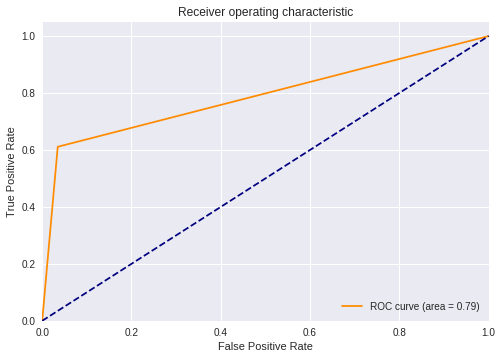

In [46]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()